# English Premier League Match Data Preprocessing

>The **Main Goal** of this notebook is to take raw, match-by-match league data and transform it into a structured PL tables. This dataset includes features like **historical league position** and **European competition flags** for each team, which will later be merged with player statistics in **Part 2** for the final top scorer prediction model.

***1/3***

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.grid'] = True

In [30]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [31]:
path1819 = "/content/drive/My Drive/PLproject/1819.csv"
path1920 = "/content/drive/My Drive/PLproject/1920.csv"
path2021 = "/content/drive/My Drive/PLproject/2021.csv"
path2122 = "/content/drive/My Drive/PLproject/2122.csv"
path2223 = "/content/drive/My Drive/PLproject/2223.csv"
path2324 = "/content/drive/My Drive/PLproject/2324.csv"
path2425 = "/content/drive/My Drive/PLproject/2425.csv"
path2526 = "/content/drive/My Drive/PLproject/2526.csv"

# Generating Historical League Standings

This section utilizes the calculated match points to accurately determine the final league standing for every historical season.

* **League Table Function:** The `season_table` function aggregates the match-level data for a given season, summing the **total `points`** and **total `goals_diff`** for each team. It then sorts the teams based on these metrics to generate the **final league rank**.
* **Tables Generation:** This function is executed for every historical season (2018/19-2025/26), yielding the definitive league standings for each year.

In [33]:
data19 = pd.read_csv(path1819)
data19.columns = data19.columns.astype(str).str.lower()
data19["season"] = 2019

data20 = pd.read_csv(path1920)
data20.columns = data20.columns.astype(str).str.lower()
data20["season"] = 2020

data21 = pd.read_csv(path2021)
data21.columns = data21.columns.astype(str).str.lower()
data21["season"] = 2021

data22 = pd.read_csv(path2122)
data22.columns = data22.columns.astype(str).str.lower()
data22["season"] = 2022

data23 = pd.read_csv(path2223)
data23.columns = data23.columns.astype(str).str.lower()
data23["season"] = 2023

data24 = pd.read_csv(path2324)
data24.columns = data24.columns.astype(str).str.lower()
data24["season"] = 2024

data25 = pd.read_csv(path2425)
data25.columns = data25.columns.astype(str).str.lower()
data25["season"] = 2025

test_data = pd.read_csv(path2526)
test_data.columns = test_data.columns.astype(str).str.lower()
test_data["season"] = 2026

In [34]:
all_frames = [data19, data20, data21, data22, data23, data24, data25, test_data]

common_cols = list(set.intersection(*[set(df.columns) for df in all_frames]))

data19 = data19[common_cols]
data20 = data20[common_cols]
data21 = data21[common_cols]
data22 = data22[common_cols]
data23 = data23[common_cols]
data24 = data24[common_cols]
data25 = data25[common_cols]
test_data = test_data[common_cols]

data = pd.concat([data19, data20, data21, data22, data23, data24, data25], axis=0)

data = data.reset_index(drop=True)

In [35]:
def matchweeks(data:pd.DataFrame):
  matches_in_season = 380
  matches_per_week = 10
  max_matchweek = 38
  data.reset_index(drop=True, inplace=True)
  data['matchweek'] = (data.index % matches_in_season) // matches_per_week + 1
  data['matchweek'] = data['matchweek'].clip(upper=max_matchweek)

  return data

def data_rearrange(data:pd.DataFrame):
  data.date = pd.to_datetime(data.date, format="mixed")
  data.drop("div", axis=1, inplace=True)
  data.columns = data.columns.str.lower()
  return data

In [36]:
df = data.copy()


In [37]:
df = matchweeks(df)
df = data_rearrange(df)



In [38]:
stats_map = {
    'shots_on_target': ('hst', 'ast'),
    'shots': ('hs', 'as'),
    'corners': ('hc', 'ac'),
    'fouls': ('hf', 'af'),
    'yellow_cards': ('hy', 'ay'),
    'red_cards': ('hr', 'ar'),
    'goals_scored': ('fthg', 'ftag'),
    "ht_goals_scored" : ("hthg", "htag"),
    'goals_conceded': ('ftag', 'fthg')
}

In [39]:
stats_cols = ['hst', 'ast', 'hs', 'as', 'hc', 'ac', 'hf', 'af', 'hy', 'ay', 'hr', 'ar', 'fthg', 'ftag', 'ftag', 'fthg', "hthg", "htag"]


In [40]:
df.head()

,as,psh,b365a,fthg,bwh,bwa,hs,hometeam,ast,bwd,...,awayteam,referee,date,psca,pscd,psd,hr,htr,htag,matchweek
0,13,1.58,7.50,2,1.53,7.50,8,Man United,4,4.0,...,Leicester,A Marriner,2018-10-08,7.69,4.07,3.93,0,H,0,1
1,10,1.89,4.50,2,1.90,4.40,12,Bournemouth,1,3.4,...,Cardiff,K Friend,2018-11-08,4.70,3.61,3.63,0,H,0,1
2,10,2.50,3.00,0,2.45,2.95,15,Fulham,9,3.3,...,Crystal Palace,M Dean,2018-11-08,2.90,3.38,3.46,0,A,1,1
3,13,6.41,1.61,0,6.25,1.57,6,Huddersfield,4,3.9,...,Chelsea,C Kavanagh,2018-11-08,1.58,3.95,4.02,0,A,2,1
4,15,3.83,2.04,1,3.80,2.00,15,Newcastle,5,3.5,...,Tottenham,M Atkinson,2018-11-08,1.89,3.53,3.57,0,A,2,1


In [41]:
def home_away_rearrange(data:pd.DataFrame, stats_map:dict, stats_cols:list):
  df_home = data.copy()
  df_away = data.copy()

  df_home["team"] = df_home["hometeam"]
  df_home["location"] = "home"
  df_away["team"] = df_away["awayteam"]
  df_away["location"] = "away"

  for stat_name, (home_col, away_col) in stats_map.items():
    df_home[stat_name] = df_home[home_col]
    df_away[stat_name] = df_away[away_col]

  df = pd.concat([df_home, df_away])
  df.drop(stats_cols + ["hometeam", "awayteam"], axis=1, inplace=True)

  df = df.sort_values(["team", "matchweek"])
  return df

In [42]:
df = home_away_rearrange(data=df, stats_map=stats_map, stats_cols=stats_cols)


In [43]:
match_result_map = {
    "H" : "home",
    "D" : "draw",
    "A" : "away"
}
df["ftr"] = df["ftr"].map(match_result_map)
df["htr"] = df["htr"].map(match_result_map)


In [44]:
def goals_diff(data:pd.DataFrame):
  data["goals_diff"] = data.goals_scored - data.goals_conceded
  return data

In [45]:
df = goals_diff(df)
df.sort_values(by=["season", "matchweek"], inplace=True)



In [46]:
df["points"] = 0

In [47]:
df.loc[((df["ftr"]=="home") & (df["location"]=="home")) | ((df["ftr"]=="away") & (df["location"]=="away")), "points"] = 3
df.loc[(df["ftr"]=="draw"), "points"] = 1

In [48]:
df[["ftr", "team", "location", "points"]].sample(10)

,ftr,team,location,points
2343,home,Bournemouth,away,0
2380,home,Bournemouth,away,0
1437,home,Arsenal,away,0
1381,away,Man City,home,0
2517,home,Arsenal,home,3
891,draw,Sheffield United,away,1
591,home,Chelsea,home,3
432,home,Norwich,away,0
1563,draw,Leeds,home,1
439,away,Chelsea,home,0


In [49]:
teams = list(df.team.unique())
points_for_team = {team: 0 for team in teams}
balance_of_goals = {team: 0 for team in teams}

In [50]:
df.head()

,psh,b365a,bwh,bwa,bwd,b365d,ftr,b365h,psa,psch,...,shots,corners,fouls,yellow_cards,red_cards,goals_scored,ht_goals_scored,goals_conceded,goals_diff,points
7,4.00,1.95,3.70,1.95,3.75,3.8,away,4.00,1.93,4.43,...,9,2,11,2,0,0,0,2,-2,0
1,1.89,4.50,1.90,4.40,3.40,3.6,home,1.90,4.58,1.88,...,12,7,11,1,0,2,1,0,2,3
5,2.43,3.40,2.35,3.30,3.10,3.2,home,2.37,3.33,2.58,...,6,2,16,2,0,0,0,2,-2,0
9,1.86,5.00,1.80,4.75,3.50,3.5,draw,1.85,4.99,2.03,...,16,5,9,1,0,0,0,0,0,1
1,1.89,4.50,1.90,4.40,3.40,3.6,home,1.90,4.58,1.88,...,10,4,9,1,0,0,0,2,-2,0


In [51]:
df_1819 = df.loc[df["season"] == 2019]
df_1920 = df.loc[df["season"] == 2020]
df_2021 = df.loc[df["season"] == 2021]
df_2122 = df.loc[df["season"] == 2022]
df_2223 = df.loc[df["season"] == 2023]
df_2324 = df.loc[df["season"] == 2024]
df_2425 = df.loc[df["season"] == 2025]

In [52]:
def season_table(df:pd.DataFrame):
  table = df.groupby("team").agg(
    points=('points', 'sum'),
    balance=('goals_diff', 'sum')).reset_index()

  table.sort_values(by=["points", "balance"], ascending=False, inplace=True)
  table.reset_index(drop=True, inplace=True)
  table.index = range(1, len(table) + 1)
  return table

In [53]:
table_1819 = season_table(df_1819)
table_1920 = season_table(df_1920)
table_2021 = season_table(df_2021)
table_2122 = season_table(df_2122)
table_2223 = season_table(df_2223)
table_2324 = season_table(df_2324)
table_2425 = season_table(df_2425)

In [54]:
table_2425

,team,points,balance
1,Liverpool,84,45
2,Arsenal,74,35
3,Man City,71,28
4,Chelsea,69,21
5,Newcastle,66,21
6,Aston Villa,66,7
7,Nott'm Forest,65,12
8,Brighton,61,7
9,Bournemouth,56,12
10,Brentford,56,9


Text(0.5, 1.0, 'Season 2024/25:')

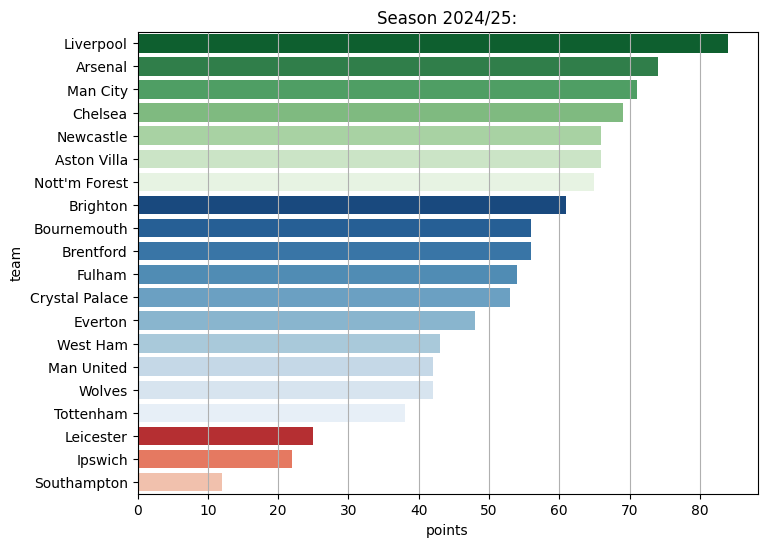

In [55]:
top_colors = sns.color_palette("Greens_r", n_colors=7)
mid_colors = sns.color_palette("Blues_r", n_colors=10)
bottom_colors = sns.color_palette("Reds_r", n_colors=3)
custom_palette = top_colors + mid_colors + bottom_colors


plt.figure(figsize=(8, 6))
sns.barplot(data=table_2425, y=table_2425.team, x=table_2425.points, orient="y", palette=custom_palette);
plt.title("Season 2024/25:")

In [56]:
teams_with_europeans_leagues_1819 = table_1819.team.iloc[0:7]
teams_with_europeans_leagues_1819 = teams_with_europeans_leagues_1819.tolist()
teams_with_europeans_leagues_1819

['Man City',
 'Liverpool',
 'Chelsea',
 'Tottenham',
 'Arsenal',
 'Man United',
 'Wolves']

In [57]:
teams_with_europeans_leagues_1920 = table_1920.team.iloc[0:7]
teams_with_europeans_leagues_1920 = teams_with_europeans_leagues_1920.tolist()
teams_with_europeans_leagues_1920[teams_with_europeans_leagues_1920.index("Wolves")] = "Arsenal"
teams_with_europeans_leagues_1920

['Liverpool',
 'Man City',
 'Man United',
 'Chelsea',
 'Leicester',
 'Tottenham',
 'Arsenal']

In [58]:
teams_with_europeans_leagues_2021 = table_2021.team.iloc[0:7]
teams_with_europeans_leagues_2021 = teams_with_europeans_leagues_2021.tolist()
teams_with_europeans_leagues_2021
teams_with_europeans_leagues_2021

['Man City',
 'Man United',
 'Liverpool',
 'Chelsea',
 'Leicester',
 'West Ham',
 'Tottenham']

In [59]:
teams_with_europeans_leagues_2122 = table_2122.team.iloc[0:7]
teams_with_europeans_leagues_2122 = teams_with_europeans_leagues_2122.tolist()
teams_with_europeans_leagues_2122
teams_with_europeans_leagues_2122

['Man City',
 'Liverpool',
 'Chelsea',
 'Tottenham',
 'Arsenal',
 'Man United',
 'West Ham']

In [60]:
teams_with_europeans_leagues_2223 = table_2223.team.iloc[0:7]
teams_with_europeans_leagues_2223 = teams_with_europeans_leagues_2223.tolist()
teams_with_europeans_leagues_2223.append("West Ham")
teams_with_europeans_leagues_2223

['Man City',
 'Arsenal',
 'Man United',
 'Newcastle',
 'Liverpool',
 'Brighton',
 'Aston Villa',
 'West Ham']

In [61]:
teams_with_europeans_leagues_2324 = table_2324.team.iloc[0:6]
teams_with_europeans_leagues_2324 = teams_with_europeans_leagues_2324.tolist()
teams_with_europeans_leagues_2324.append("Man Utd")
teams_with_europeans_leagues_2324

['Man City',
 'Arsenal',
 'Liverpool',
 'Aston Villa',
 'Tottenham',
 'Chelsea',
 'Man Utd']

In [62]:
teams_with_europeans_leagues_2425 = table_2425.team.iloc[0:7]
teams_with_europeans_leagues_2425 =teams_with_europeans_leagues_2425.tolist()
teams_with_europeans_leagues_2425.extend(["Man Utd", "Totenham"])
teams_with_europeans_leagues_2425

['Liverpool',
 'Arsenal',
 'Man City',
 'Chelsea',
 'Newcastle',
 'Aston Villa',
 "Nott'm Forest",
 'Man Utd',
 'Totenham']

# European Context

The final step is to determine which teams qualified for Europe and merge this as a predictive feature for the subsequent season.

>* **European Qualification Flagging:** Based on the final rank (`position`) from the generated tables, the code manually defines the lists of teams that qualified for Europe (reflecting real-world rules) for the **following season**. A binary flag DataFrame (`df_flags`) is created, where **1** indicates European qualification and **0** indicates none.
>* **Final Context Dataset:** All seasonal tables are merged and concatenated with these newly created European flags. The final league rank is explicitly renamed to **`previous_season_position`**.


In [63]:
european_teams_map = {
    1819: set(teams_with_europeans_leagues_1819),
    1920: set(teams_with_europeans_leagues_1920),
    2021: set(teams_with_europeans_leagues_2021),
    2122: set(teams_with_europeans_leagues_2122),
    2223: set(teams_with_europeans_leagues_2223),
    2324: set(teams_with_europeans_leagues_2324),
    2425: set(teams_with_europeans_leagues_2425)

}

In [64]:
teams_1819 = df[df.season == 2019].team.unique()
teams_1920 = df[df.season == 2020].team.unique()
teams_2021 = df[df.season == 2021].team.unique()
teams_2122 = df[df.season == 2022].team.unique()
teams_2223 = df[df.season == 2023].team.unique()
teams_2324 = df[df.season == 2024].team.unique()
teams_2425 = df[df.season == 2025].team.unique()

teams_set = set(teams_1819) | set(teams_1920) | set(teams_2021) | set(teams_2122) | set(teams_2223) | set(teams_2324) | set(teams_2425)

teams = list(teams_set)

In [65]:
in_europe1819 = pd.Series(np.where(pd.Series(teams_1819).isin(teams_with_europeans_leagues_1819), 1, 0))
in_europe1819 = pd.concat([pd.Series(teams_1819), in_europe1819], axis=1)
in_europe1819.columns = ["team", "is_in_europe"]
in_europe1819["season"] = 1920

in_europe1920 = pd.Series(np.where(pd.Series(teams_1920).isin(teams_with_europeans_leagues_1920), 1, 0))
in_europe1920 = pd.concat([pd.Series(teams_1920), in_europe1920], axis=1)
in_europe1920.columns = ["team", "is_in_europe"]
in_europe1920["season"] = 2021

in_europe2021 = pd.Series(np.where(pd.Series(teams_2021).isin(teams_with_europeans_leagues_2021), 1, 0))
in_europe2021 = pd.concat([pd.Series(teams_2021), in_europe2021], axis=1)
in_europe2021.columns = ["team", "is_in_europe"]
in_europe2021["season"] = 2122

in_europe2122 = pd.Series(np.where(pd.Series(teams_2122).isin(teams_with_europeans_leagues_2122), 1, 0))
in_europe2122 = pd.concat([pd.Series(teams_2122), in_europe2122], axis=1)
in_europe2122.columns = ["team", "is_in_europe"]
in_europe2122["season"] = 2223

in_europe2223 = pd.Series(np.where(pd.Series(teams_2223).isin(teams_with_europeans_leagues_2223), 1, 0))
in_europe2223 = pd.concat([pd.Series(teams_2223), in_europe2223], axis=1)
in_europe2223.columns = ["team", "is_in_europe"]
in_europe2223["season"] = 2324

in_europe2324 = pd.Series(np.where(pd.Series(teams_2324).isin(teams_with_europeans_leagues_2324), 1, 0))
in_europe2324 = pd.concat([pd.Series(teams_2324), in_europe2324], axis=1)
in_europe2324.columns = ["team", "is_in_europe"]
in_europe2324["season"] = 2425

in_europe2425 = pd.Series(np.where(pd.Series(teams_2425).isin(teams_with_europeans_leagues_2425), 1, 0))
in_europe2425 = pd.concat([pd.Series(teams_2425), in_europe2425], axis=1)
in_europe2425.columns = ["team", "is_in_europe"]
in_europe2425["season"] = 2526

df_flags = pd.concat([
    in_europe1819,
    in_europe1920,
    in_europe2021,
    in_europe2122,
    in_europe2223,
    in_europe2324,
    in_europe2425
], ignore_index=True)
df_flags

,team,is_in_europe,season
0,Arsenal,1,1920
1,Bournemouth,0,1920
2,Brighton,0,1920
3,Burnley,0,1920
4,Cardiff,0,1920
...,...,...,...
135,Nott'm Forest,1,2526
136,Southampton,0,2526
137,Tottenham,0,2526
138,West Ham,0,2526


In [66]:
import pandas as pd
import numpy as np

table_1819['position'] = range(1, len(table_1819) + 1)
table_1920['position'] = range(1, len(table_1920) + 1)
table_2021['position'] = range(1, len(table_2021) + 1)
table_2122['position'] = range(1, len(table_2122) + 1)
table_2223['position'] = range(1, len(table_2223) + 1)
table_2324['position'] = range(1, len(table_2324) + 1)
table_2425['position'] = range(1, len(table_2425) + 1)

tables_map = {
    1819: table_1819,
    1920: table_1920,
    2021: table_2021,
    2122: table_2122,
    2223: table_2223,
    2324: table_2324,
    2425: table_2425
}

next_season_map = {
    1819: 1920,
    1920: 2021,
    2021: 2122,
    2122: 2223,
    2223: 2324,
    2324: 2425,
    2425: 2526
}

all_seasons_merged = [
    pd.merge(
        tables_map[current_season],
        df_flags[df_flags.season == next_season][['team', 'is_in_europe', 'season']],
        on="team",
        how="left"
    ).sort_values(by="points", ascending=False).reset_index(drop=True)
    for current_season, next_season in next_season_map.items()
    if current_season in tables_map
]

df = pd.concat(all_seasons_merged, ignore_index=True)

df = df.rename(columns={'position': 'previous_season_position'}).drop(["points", "balance"], axis=1)

df.head()

,team,previous_season_position,is_in_europe,season
0,Man City,1,1,1920
1,Liverpool,2,1,1920
2,Chelsea,3,1,1920
3,Tottenham,4,1,1920
4,Arsenal,5,1,1920


In [67]:
df.to_csv("teams_info.csv")